<a href="https://colab.research.google.com/github/Rishu-N/TENSORFLOW/blob/main/MultiClass_Computer_Vision_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import and become one with data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-09-07 16:59:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.207, 173.194.69.207, 108.177.119.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.3’

10_food_classes_all 100%[===================>] 495.13M  41.5MB/s    in 13s     

2023-09-07 16:59:59 (39.3 MB/s) - ‘10_food_classes_all_data.zip.3’ saved [519183241/519183241]



In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 

In [ ]:
#setup train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


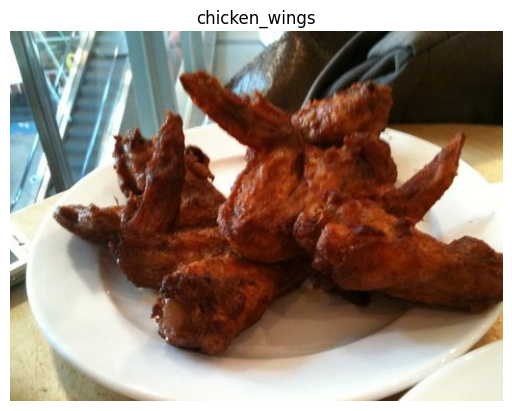

In [ ]:
import random
img = view_random_image(train_dir,random.choice(class_names))

In [ ]:
# Preprocessing the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=32,class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# Create a model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

model_1 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

#compile our model

model_1.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["Accuracy"])

# Fit the model

history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))


Epoch 1/5
235/235 [==============================] - 31s 120ms/step - loss: 2.1929 - Accuracy: 0.2032 - val_loss: 2.0888 - val_Accuracy: 0.2196
Epoch 2/5
235/235 [==============================] - 29s 124ms/step - loss: 1.9722 - Accuracy: 0.3037 - val_loss: 1.9556 - val_Accuracy: 0.2980
Epoch 3/5
235/235 [==============================] - 33s 142ms/step - loss: 1.8100 - Accuracy: 0.3780 - val_loss: 1.9311 - val_Accuracy: 0.3216
Epoch 4/5
235/235 [==============================] - 29s 122ms/step - loss: 1.4507 - Accuracy: 0.5077 - val_loss: 2.1150 - val_Accuracy: 0.3064
Epoch 5/5
235/235 [==============================] - 32s 138ms/step - loss: 0.8593 - Accuracy: 0.7195 - val_loss: 2.6014 - val_Accuracy: 0.2836


In [ ]:
# evaluate the model
model_1.evaluate(test_data)

79/79 [==============================] - 6s 79ms/step - loss: 2.6014 - Accuracy: 0.2836


[2.60140323638916, 0.28360000252723694]

In [ ]:
#check the model's loss curves

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

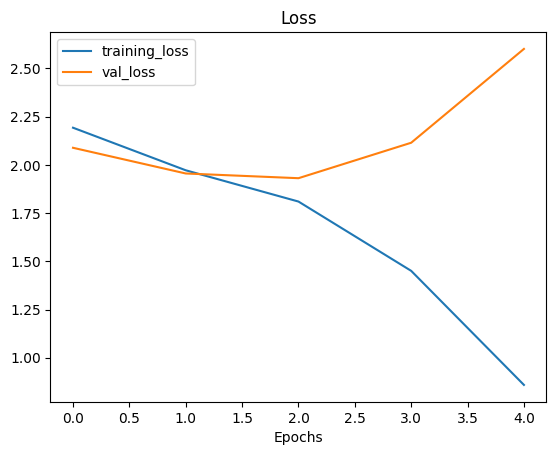

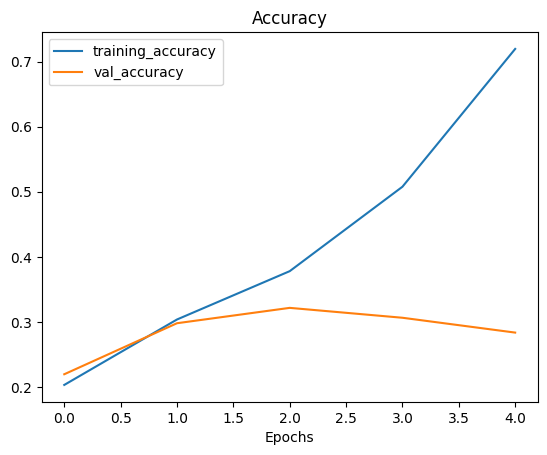

In [ ]:
plot_loss_curves(history_1)

In [ ]:
#overfitting of the data is happening
model_1.evaluate(train_data)

235/235 [==============================] - 21s 89ms/step - loss: 0.3345 - Accuracy: 0.9273


[0.3344743847846985, 0.9273333549499512]

In [ ]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 activation_2 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_12 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [ ]:
model_2 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history_2 = model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))


Epoch 1/5
235/235 [==============================] - 31s 124ms/step - loss: 2.1185 - accuracy: 0.2445 - val_loss: 1.9145 - val_accuracy: 0.3320
Epoch 2/5
235/235 [==============================] - 32s 138ms/step - loss: 1.7888 - accuracy: 0.3880 - val_loss: 1.8312 - val_accuracy: 0.3588
Epoch 3/5
235/235 [==============================] - 35s 148ms/step - loss: 1.4576 - accuracy: 0.5179 - val_loss: 1.8820 - val_accuracy: 0.3556
Epoch 4/5
235/235 [==============================] - 27s 115ms/step - loss: 1.0280 - accuracy: 0.6740 - val_loss: 2.1263 - val_accuracy: 0.3364
Epoch 5/5
235/235 [==============================] - 29s 123ms/step - loss: 0.6341 - accuracy: 0.8132 - val_loss: 2.3694 - val_accuracy: 0.3440


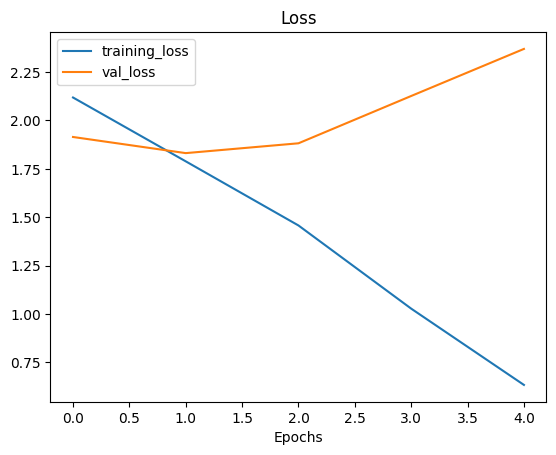

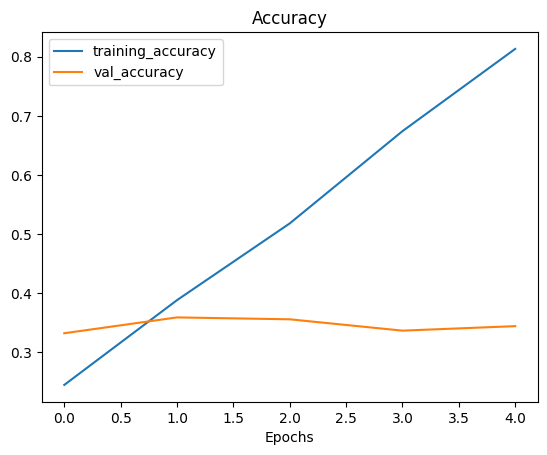

In [ ]:
plot_loss_curves(history_2)

In [ ]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 29160)             0         
                                                                 
 dense_3 (Dense)             (None, 10)               

In [ ]:
#Data Augmenattion
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,rotation_range=0.2,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
model_3 = tf.keras.models.clone_model(model_1)

model_3.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history_3 = model_3.fit(train_data_augmented,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 108s 458ms/step - loss: 2.1036 - accuracy: 0.2392 - val_loss: 1.9910 - val_accuracy: 0.2924
Epoch 2/5
235/235 [==============================] - 107s 456ms/step - loss: 2.0281 - accuracy: 0.2813 - val_loss: 1.8764 - val_accuracy: 0.3432
Epoch 3/5
235/235 [==============================] - 104s 442ms/step - loss: 1.9632 - accuracy: 0.3108 - val_loss: 1.9488 - val_accuracy: 0.3440
Epoch 4/5
235/235 [==============================] - 104s 442ms/step - loss: 1.9227 - accuracy: 0.3343 - val_loss: 1.7458 - val_accuracy: 0.4068
Epoch 5/5
235/235 [==============================] - 104s 443ms/step - loss: 1.8727 - accuracy: 0.3497 - val_loss: 1.8543 - val_accuracy: 0.3832


In [ ]:
model_3.evaluate(test_data)

79/79 [==============================] - 7s 82ms/step - loss: 1.8543 - accuracy: 0.3832


[1.8543477058410645, 0.3831999897956848]

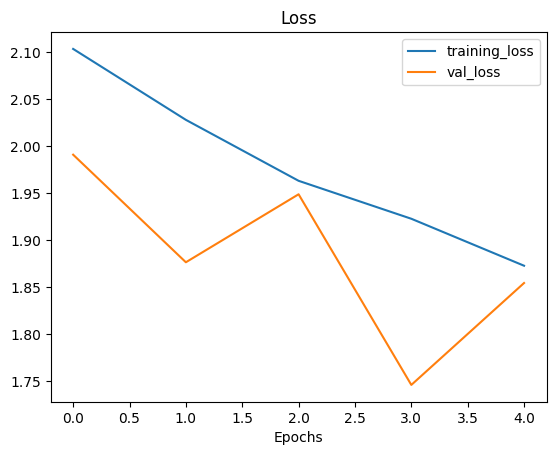

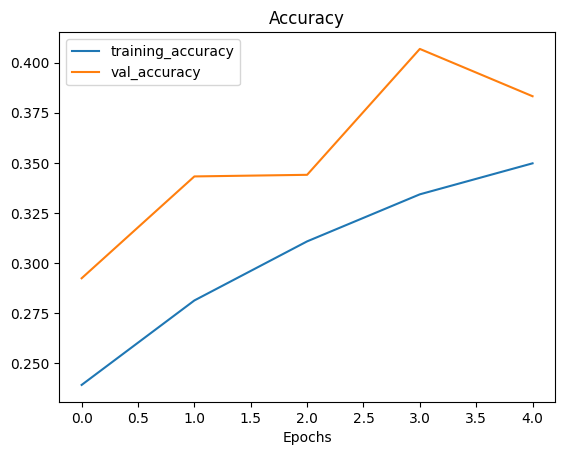

In [ ]:
plot_loss_curves(history_3)

In [ ]:
#use custom images
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 27ms/step


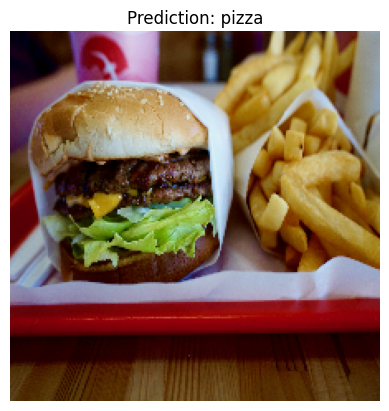

In [ ]:
pred_and_plot(model_3,"/content/03-hamburger.jpeg",class_names)

1/1 [==============================] - 0s 18ms/step


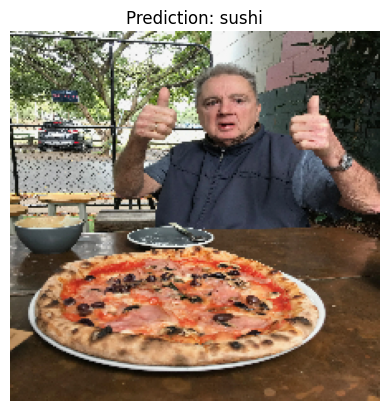

In [ ]:
pred_and_plot(model_3,"/content/03-pizza-dad.jpeg",class_names)

1/1 [==============================] - 0s 43ms/step


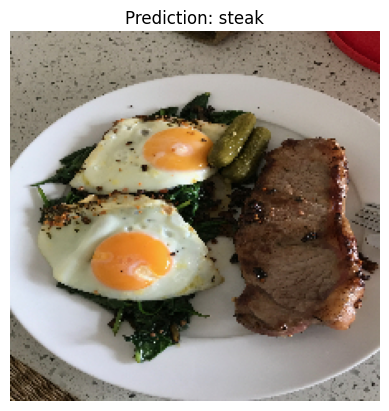

In [ ]:
pred_and_plot(model_3,"/content/03-steak.jpeg",class_names)

1/1 [==============================] - 0s 28ms/step


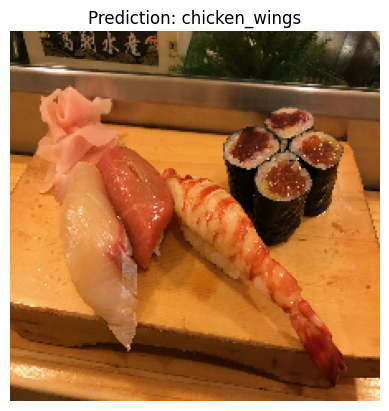

In [ ]:
pred_and_plot(model_3,"/content/03-sushi.jpeg",class_names)

In [ ]:
# Save a model
model_3.save("saved_model_3")

In [ ]:
loaded_model_3 = tf.keras.models.load_model("saved_model_3")
loaded_model_3.evaluate(test_data)

79/79 [==============================] - 13s 164ms/step - loss: 1.8543 - accuracy: 0.3832


[1.8543474674224854, 0.3831999897956848]

In [ ]:
model_3.evaluate(test_data)

79/79 [==============================] - 8s 106ms/step - loss: 1.8543 - accuracy: 0.3832


[1.8543477058410645, 0.3831999897956848]